In [1]:
from google.colab import files
uploaded = files.upload()

Saving Microsoft.csv to Microsoft.csv


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model


In [3]:

df_final = pd.read_csv("Microsoft.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [4]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.447268,53033600
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.449788,113772800
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.463017,125740800
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.451678,69564800
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.458607,58982400


In [5]:

df_final.shape

(7334, 6)

In [6]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7334.000000,7334.000000,7334.000000,7334.000000,7334.000000,7.334000e+03
mean,28.578362,28.891892,28.261203,28.582426,24.008891,6.022760e+07
std,22.279033,22.476021,22.054379,22.275692,21.941225,3.400345e+07
min,0.591146,0.604167,0.583333,0.598090,0.434039,3.705600e+06
25%,12.457031,12.595703,12.261719,12.488281,9.062849,3.821840e+07
50%,26.980000,27.235000,26.730000,26.990000,20.431164,5.429885e+07
75%,34.716562,35.099998,34.250000,34.687500,26.993589,7.367888e+07
max,115.419998,116.180000,114.930000,115.610001,115.112709,7.645040e+08


In [7]:
df_final.isnull().values.any()

False

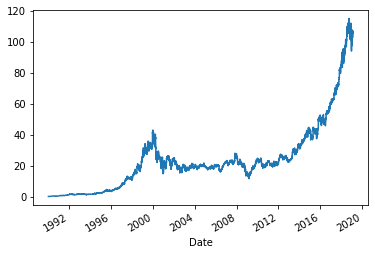

In [8]:
df_final['Adj Close'].plot()

In [9]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

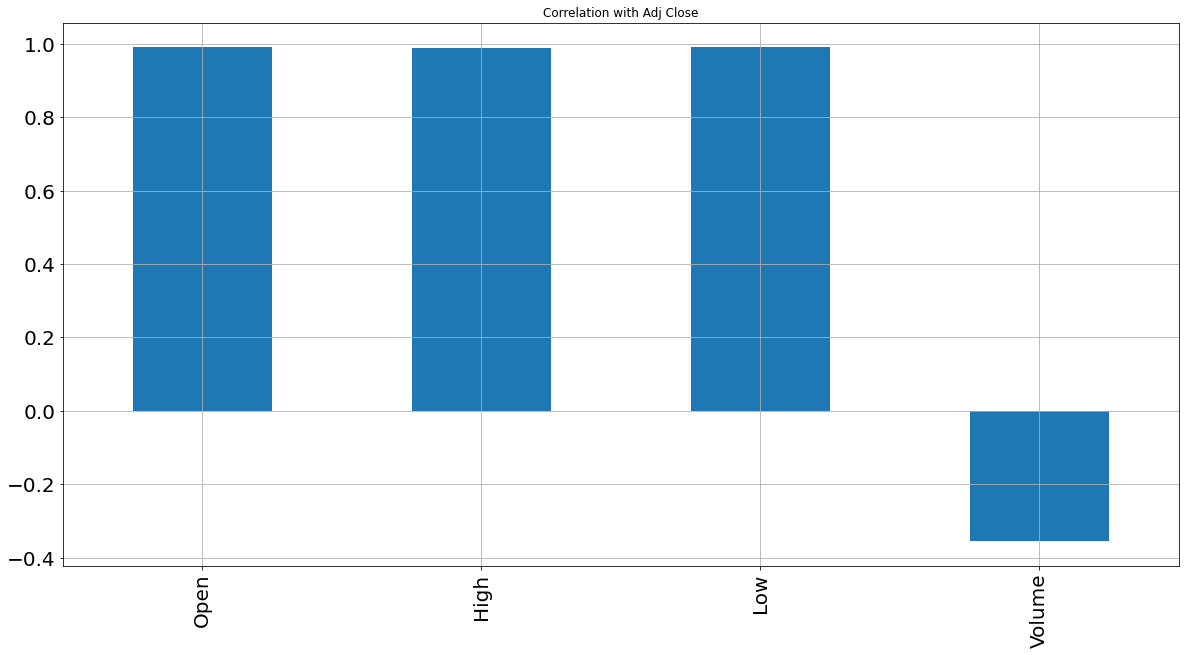

In [10]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [11]:
test = df_final

target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.447268,53033600
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.449788,113772800
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.463017,125740800
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.451678,69564800
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.458607,58982400


In [12]:

feature_columns = ['Open', 'High', 'Low', 'Volume']

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
1990-01-02,0.000129,0.000105,0.000129,0.064837
1990-01-03,0.000265,0.000195,0.000273,0.144673
1990-01-04,0.000249,0.000300,0.000288,0.160404
1990-01-05,0.000386,0.000300,0.000334,0.086566
1990-01-08,0.000265,0.000240,0.000273,0.072656


In [16]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)




target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]


validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n .....After process.... \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
1990-01-02,0.000129,0.000105,0.000129,0.064837
1990-01-03,0.000265,0.000195,0.000273,0.144673
1990-01-04,0.000249,0.000300,0.000288,0.160404
1990-01-05,0.000386,0.000300,0.000334,0.086566
1990-01-08,0.000265,0.000240,0.000273,0.072656


Shape of features :  (7154, 4)
Shape of target :  (7154, 1)


,Open,High,Low,Volume
Date,,,,
2018-05-15,0.841677,0.841403,0.837424,0.027456
2018-05-16,0.842722,0.837509,0.839873,0.017980
2018-05-17,0.837497,0.838721,0.832964,0.017799
2018-05-18,0.830966,0.833443,0.834538,0.018612
2018-05-21,0.839587,0.842787,0.841447,0.020658


,Adj Close
Date,
2018-05-15,95.577698
2018-05-16,96.807632
2018-05-17,96.708443
2018-05-18,97.859024
2018-05-21,97.511864



 .....After process.... 

Shape of features :  (7064, 4)
Shape of target :  (7064, 1)


,Adj Close
Date,
2018-01-05,86.325592
2018-01-08,86.581169
2018-01-09,88.075310
2018-01-10,86.846573
2018-01-11,88.606117


In [17]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [18]:

X_train.shape

(6422, 4)

In [19]:
X_test.shape

(642, 4)

In [20]:
y_train.shape

(6422,)

In [21]:
y_test.shape

(642,)

In [22]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  50.39151721623172
R2 score:  -312.93225646761897


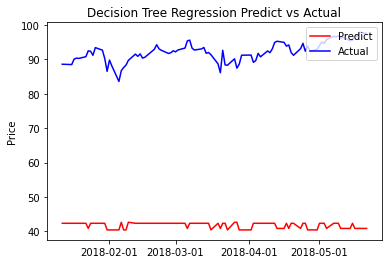

In [23]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

In [24]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [29]:

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import adam_v2

#from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
803/803 [==============================] - 4s 2ms/step - loss: 110.1634
Epoch 2/200
803/803 [==============================] - 2s 2ms/step - loss: 26.0234
Epoch 3/200
803/803 [==============================] - 2s 2ms/step - loss: 21.5825
Epoch 4/200
803/803 [==============================] - 2s 2ms/step - loss: 12.5996
Epoch 5/200
803/803 [==============================] - 2s 2ms/step - loss: 6.0824
Epoch 6/200
803/803 [==============================] - 2s 2ms/step - loss: 2.8010
Epoch 7/200
803/803 [==============================] - 2s 2ms/step - loss: 1.6857
Epoch 8/200
803/803 [==============================] - 2s 2ms/step - loss: 1.3664
Epoch 9/200
803/803 [==============================] - 2s 2ms/step - loss: 1.2470
Epoch 10/200
803/803 [==============================] - 2s 2ms/step - loss: 1.1841
Epoch 11/200
803/803 [==============================] - 2s 2ms/step - loss: 1.1446
Epoch 12/200
803/803 [==============================] - 2s 2ms/step - loss: 1.1176
Epoch 13

In [30]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)


The R2 score on the Train set is:	0.866
The R2 score on the Test set is:	0.783


In [31]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

642/642 [==============================] - 1s 1ms/step - loss: 31.5178


In [32]:
print('LSTM: %f'%score_lstm)

LSTM: 31.517809


In [33]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

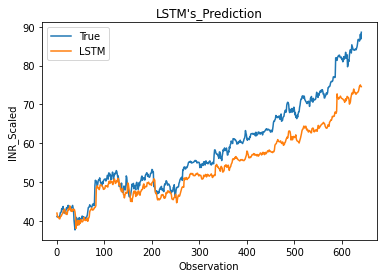

In [34]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()


In [35]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_excel('PredictionResults.xlsx')